<a href="https://www.kaggle.com/code/narendranandagiri/bank-term-deposit-prediction?scriptVersionId=157011638" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("/kaggle/input/bank-term-deposit-predictions/test.csv")
df_test=pd.read_csv("/kaggle/input/bank-term-deposit-predictions/train.csv")

In [3]:
df_train.columns.nunique()

17

In [4]:
df_test.columns.nunique()

17

In [5]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df_train.shape

(4521, 17)

In [8]:
df_test.shape

(45211, 17)

In [9]:
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
(df_train.dtypes==df_test.dtypes).sum()==17

True

In [12]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [13]:
cols=df_train[['job','marital','education','default','housing','loan','contact','month','poutcome','y']]
for ind,i in enumerate(cols):
  print('for column: ',i)
  print(df_train[i].nunique(),' elements')
  print(df_train[i].unique())
  print()

for column:  job
12  elements
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

for column:  marital
3  elements
['married' 'single' 'divorced']

for column:  education
4  elements
['primary' 'secondary' 'tertiary' 'unknown']

for column:  default
2  elements
['no' 'yes']

for column:  housing
2  elements
['no' 'yes']

for column:  loan
2  elements
['no' 'yes']

for column:  contact
3  elements
['cellular' 'unknown' 'telephone']

for column:  month
12  elements
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

for column:  poutcome
4  elements
['unknown' 'failure' 'other' 'success']

for column:  y
2  elements
['no' 'yes']



<Axes: xlabel='count', ylabel='y'>

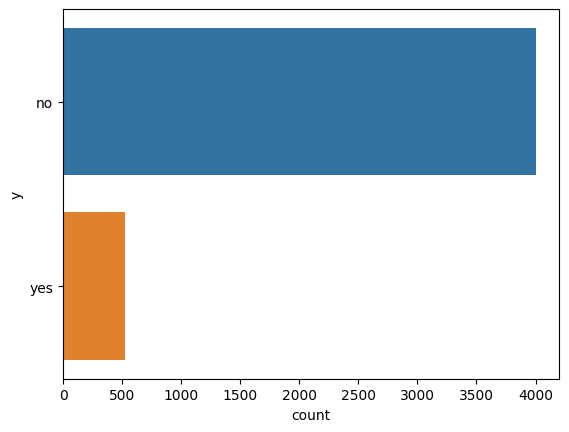

In [14]:
sns.countplot(data=df_train,y='y')

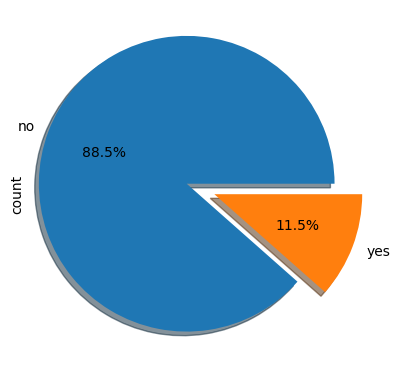

In [15]:
explode = [0.2 , 0 ]
df_train['y'].value_counts().plot.pie(autopct='%1.1f%%' , explode = explode , shadow = True,labels = ['no','yes'] )
plt.show()

<Figure size 1500x700 with 0 Axes>

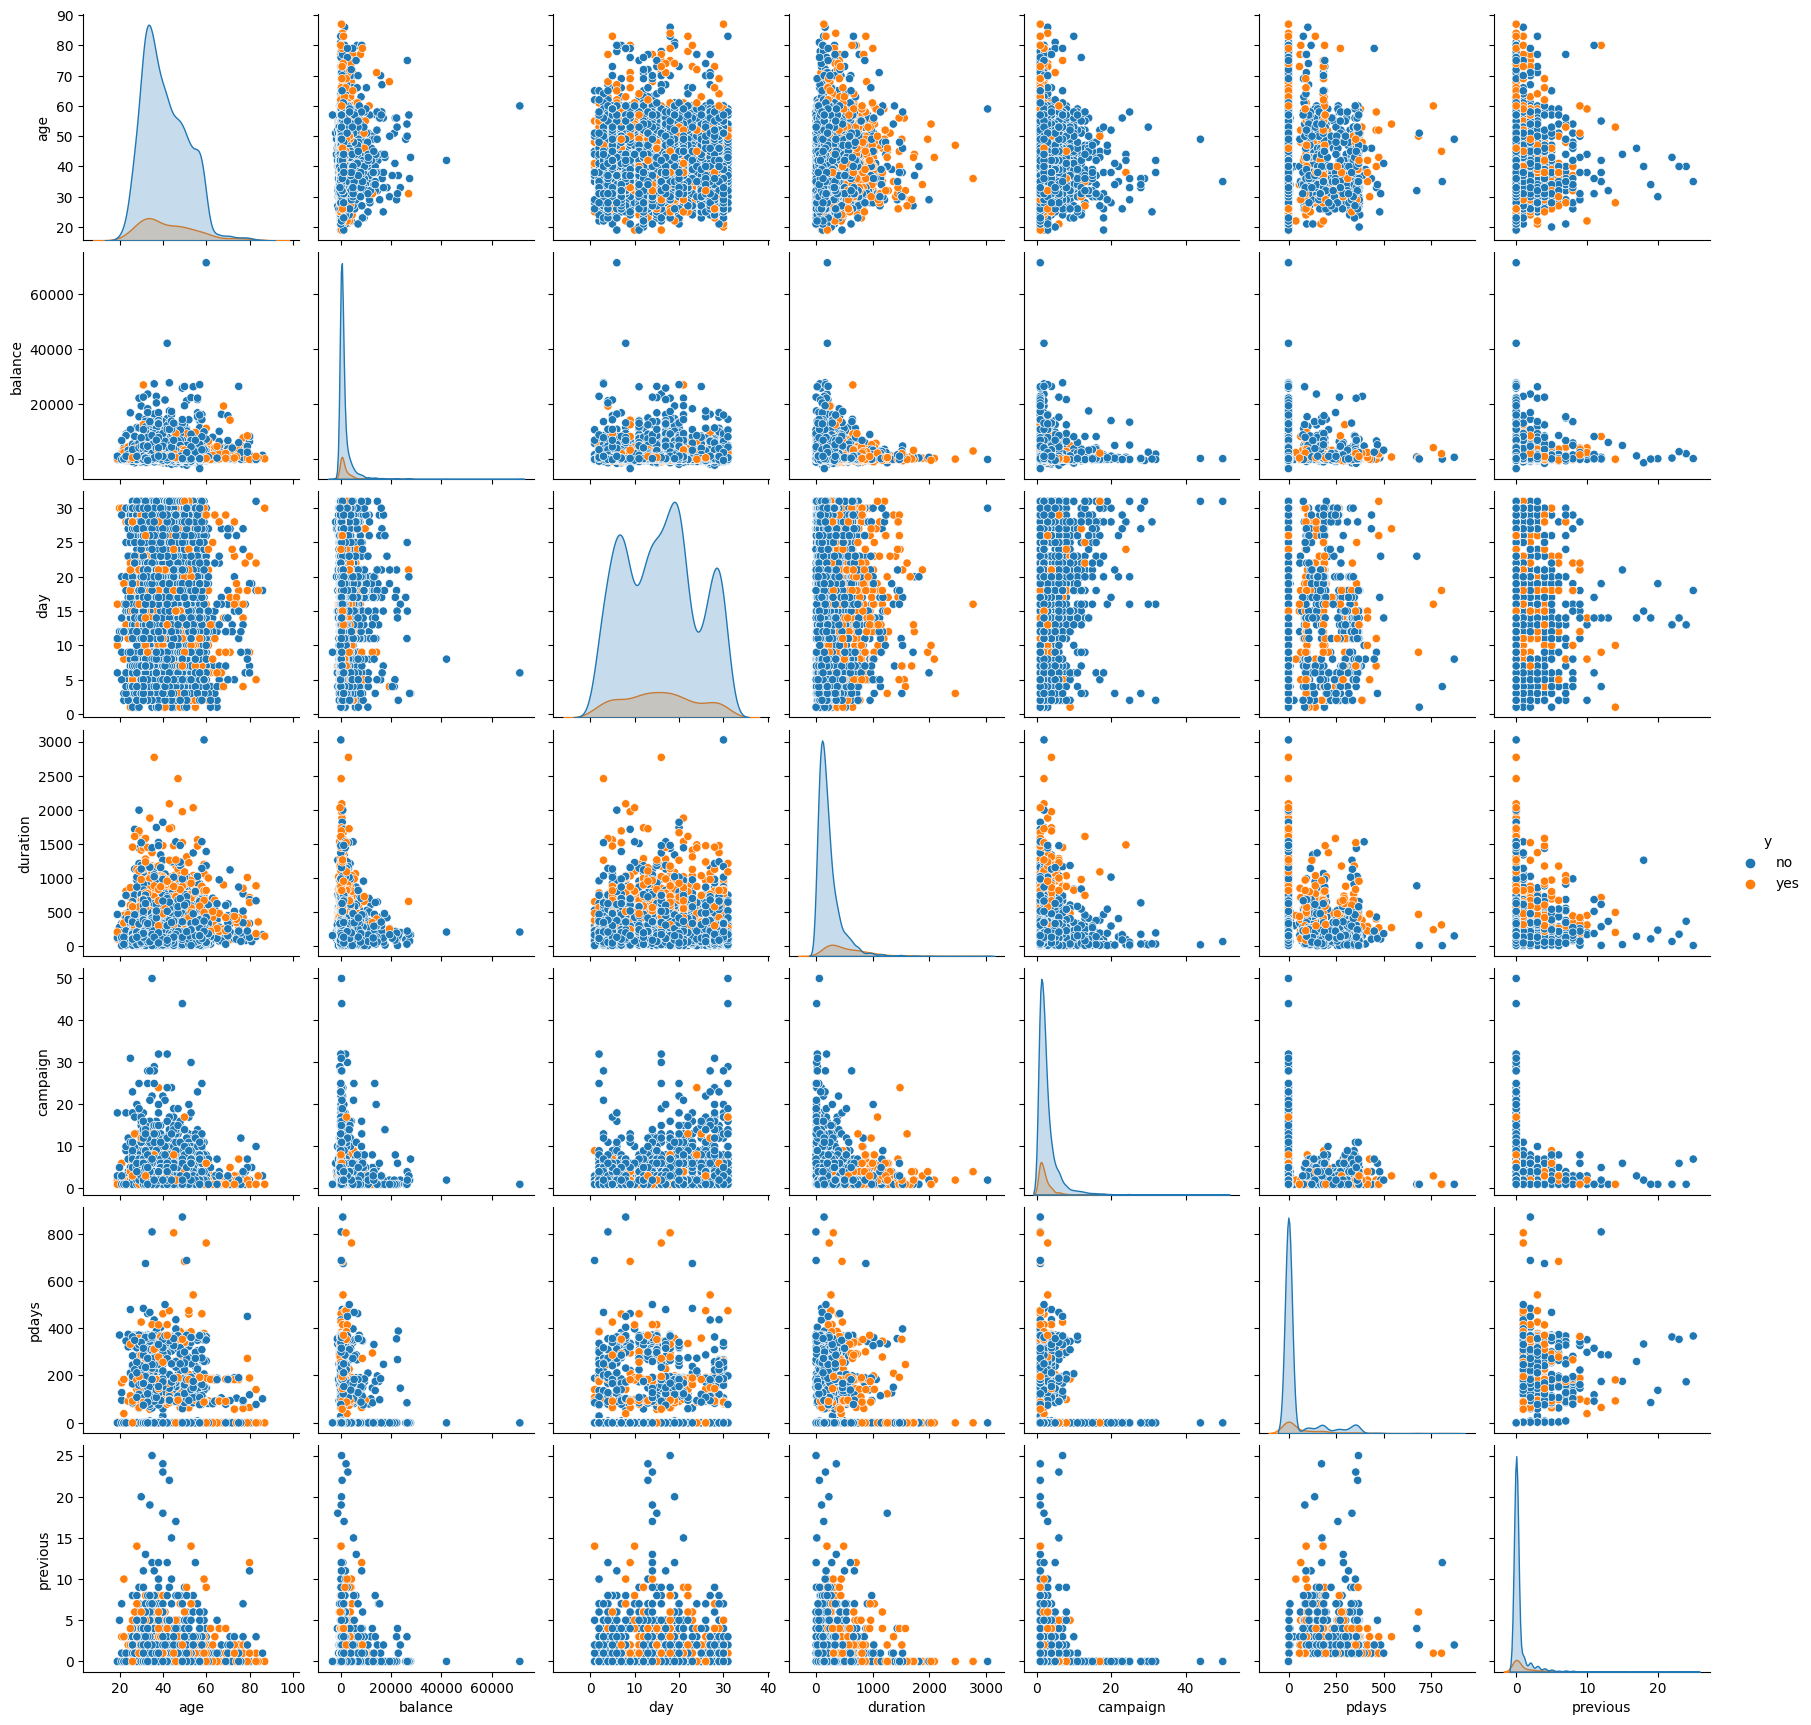

In [16]:
plt.figure(figsize=(15,7))
sns.pairplot(df_train,hue='y')
plt.show()

In [17]:
df_plot_catogorical=['job','marital','education','default','housing','loan','contact','day','month','poutcome','y']

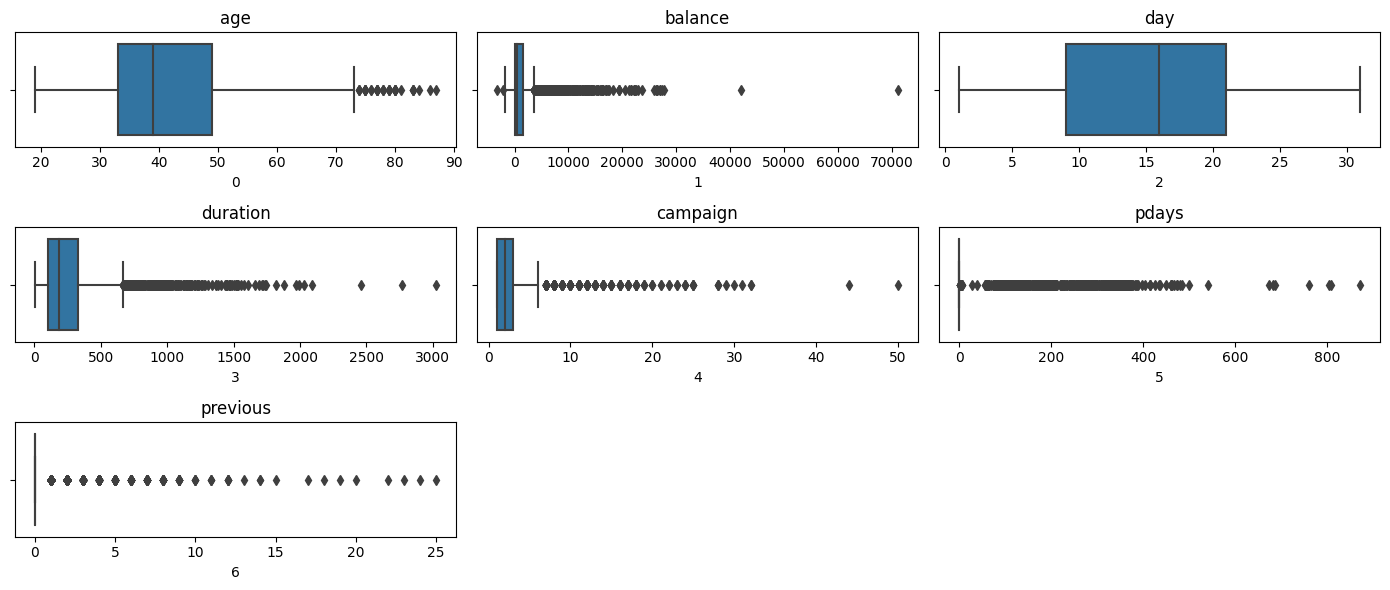

In [18]:
df_plot=['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(14,6))
for i,q in enumerate(df_plot):
    plt.subplot(3,3,i+1)
    plt.title(q)
    sns.boxplot(data=df_train,x=q)
    plt.xlabel(i)
plt.tight_layout()
plt.show()

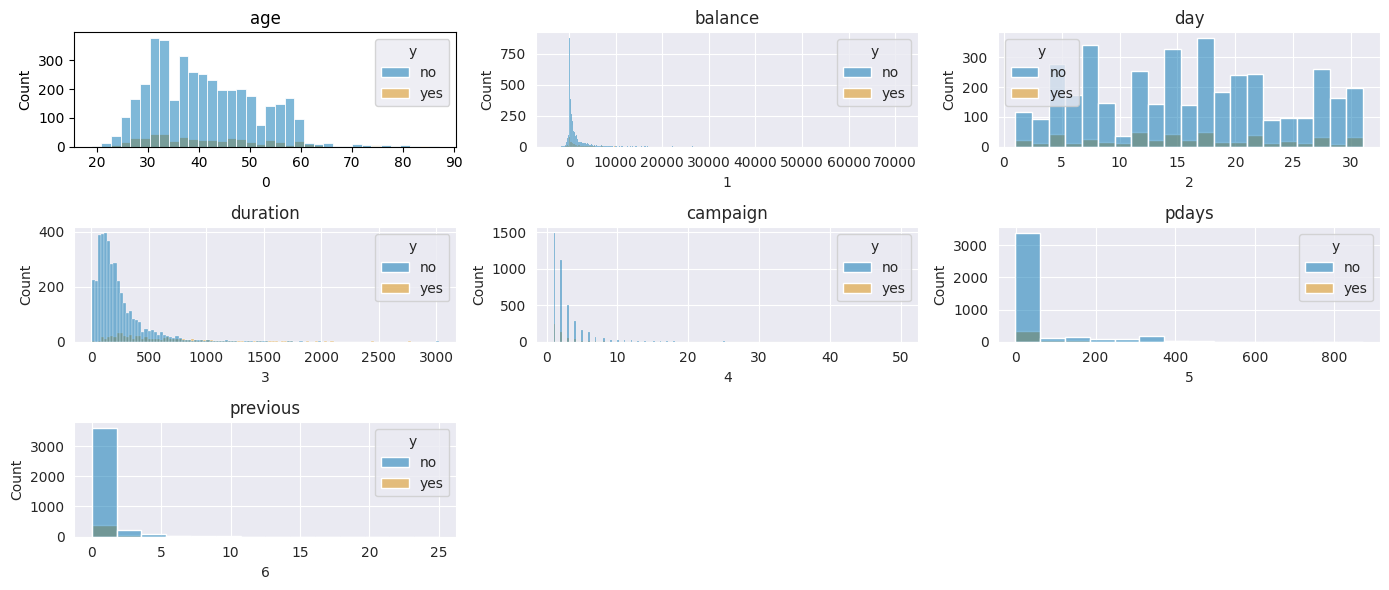

In [19]:
plt.figure(figsize=(14,6))
for i,q in enumerate(df_plot):
    plt.subplot(3,3,i+1)
    plt.title(q)
    sns.set_style('darkgrid')
    sns.histplot(data=df_train,x=q,hue='y',palette='colorblind')
    plt.xlabel(i)
plt.tight_layout()
plt.show()

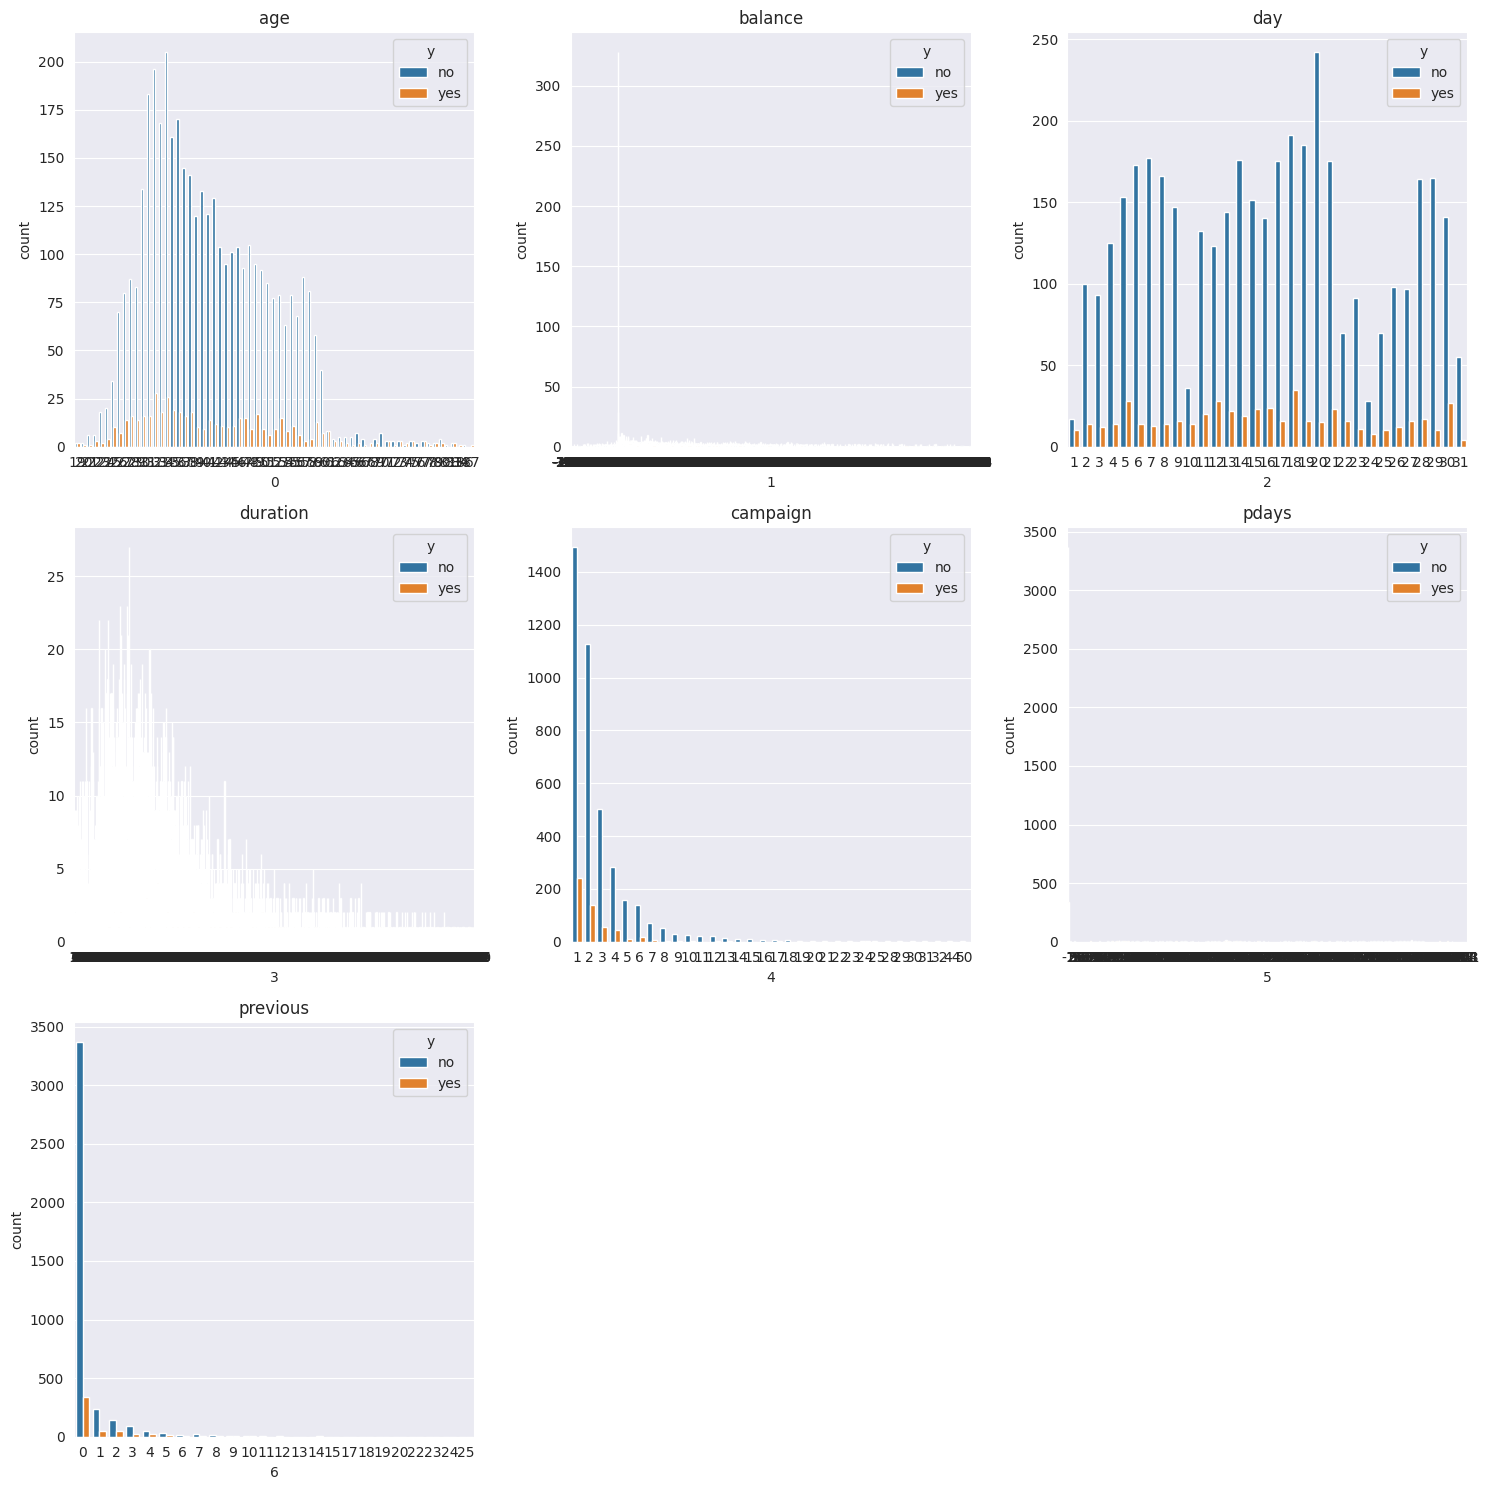

In [20]:
plt.figure(figsize=(15,15))
for i,q in enumerate(df_plot):
    plt.subplot(3,3,i+1)
    plt.title(q)
    sns.set_style('darkgrid')
    sns.countplot(data=df_train,x=q,hue='y')
    plt.xlabel(i)
plt.tight_layout()
plt.show() 

education  y  
primary    no      614
           yes      64
secondary  no     2061
           yes     245
tertiary   no     1157
           yes     193
unknown    no      168
           yes      19
Name: count, dtype: int64

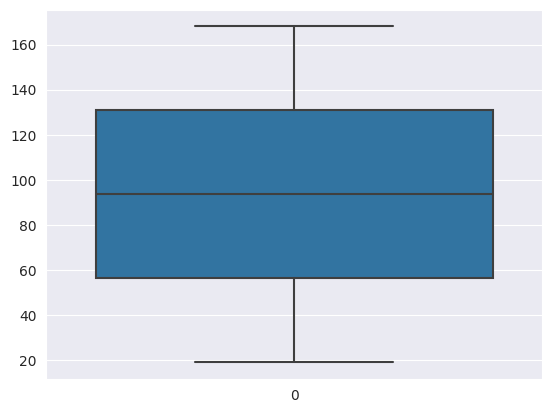

In [21]:
l=df_train.groupby('education')['y'].value_counts()
sns.boxplot(l['unknown'])
l

In [22]:
col=[]
q1=[]
q2=[]
q3=[]
upper_fence=[]
lower_fence=[]
iqr=[]
dfq=['age','balance','day','duration','campaign','pdays','previous']
for i,p in enumerate(df_plot):
    col.append(p)
    q1.append(df_train[p].quantile(0.25))
    q3.append(df_train[p].quantile(0.75))
    q2.append(df_train[p].median())
    iqr.append(q3[i]-q1[i])
    upper_fence.append(q3[i]+1.5*iqr[i])
    lower_fence.append(q3[i]-1.5*iqr[i])

quan={'col':col,'q1':q1,'q2':q2,'q3':q3,'IQR':iqr,'upper_fence':upper_fence,'lower_fence':lower_fence}
quantile=pd.DataFrame(quan)
quantile.columns=['column','Q1','Q2','Q3','iqr','upper fence','lower fence']
quantile

,column,Q1,Q2,Q3,iqr,upper fence,lower fence
0,age,33.0,39.0,49.0,16.0,73.0,25.0
1,balance,69.0,444.0,1480.0,1411.0,3596.5,-636.5
2,day,9.0,16.0,21.0,12.0,39.0,3.0
3,duration,104.0,185.0,329.0,225.0,666.5,-8.5
4,campaign,1.0,2.0,3.0,2.0,6.0,0.0
5,pdays,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
6,previous,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_plot_cat=df_train[['job','marital','education','default','housing','loan','contact','month','poutcome']]

In [24]:
job=df_train.groupby('job')['y'].value_counts().unstack()
job['total']=job['yes']+job['no']
job['accepting percentage']=(job['yes']/job['total'])*100
job

y,no,yes,total,accepting percentage
job,,,,
admin.,420,58,478,12.133891
blue-collar,877,69,946,7.293869
entrepreneur,153,15,168,8.928571
housemaid,98,14,112,12.500000
management,838,131,969,13.519092
retired,176,54,230,23.478261
self-employed,163,20,183,10.928962
services,379,38,417,9.112710
student,65,19,84,22.619048


<Axes: ylabel='job'>

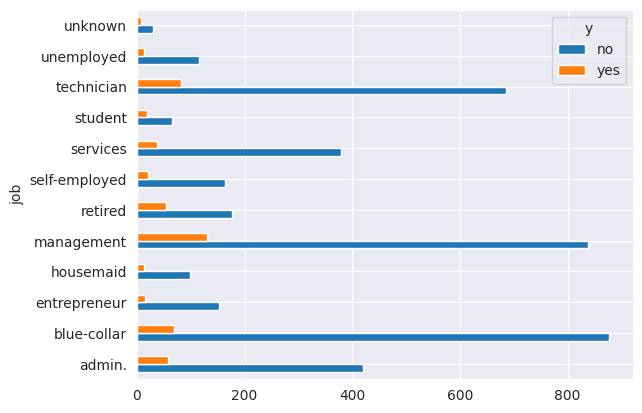

In [25]:
df_train.groupby('job')['y'].value_counts().unstack().plot.barh()

In [26]:
marital=df_train.groupby('marital')['y'].value_counts().unstack()
marital['total']=marital['yes']+marital['no']
marital['accepting percentage']=(marital['yes']/marital['total'])*100
marital

y,no,yes,total,accepting percentage
marital,,,,
divorced,451,77,528,14.583333
married,2520,277,2797,9.903468
single,1029,167,1196,13.963211


<Axes: ylabel='marital'>

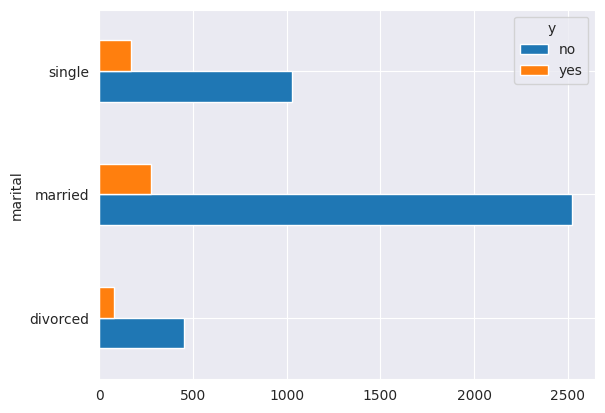

In [27]:
df_train.groupby('marital')['y'].value_counts().unstack().plot.barh()

In [28]:
education=df_train.groupby('education')['y'].value_counts().unstack()
education['total']=education['yes']+education['no']
education['accepting percentage']=(education['yes']/education['total'])*100
education

y,no,yes,total,accepting percentage
education,,,,
primary,614,64,678,9.439528
secondary,2061,245,2306,10.624458
tertiary,1157,193,1350,14.296296
unknown,168,19,187,10.160428


<Axes: ylabel='education'>

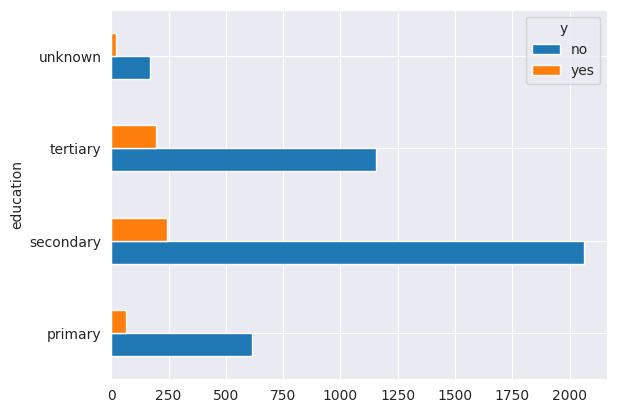

In [29]:
df_train.groupby('education')['y'].value_counts().unstack().plot.barh()

In [30]:
default=df_train.groupby('default')['y'].value_counts().unstack()
default['total']=default['yes']+default['no']
default['accepting percentage']=(default['yes']/default['total'])*100
default

y,no,yes,total,accepting percentage
default,,,,
no,3933,512,4445,11.518560
yes,67,9,76,11.842105


<Axes: ylabel='default'>

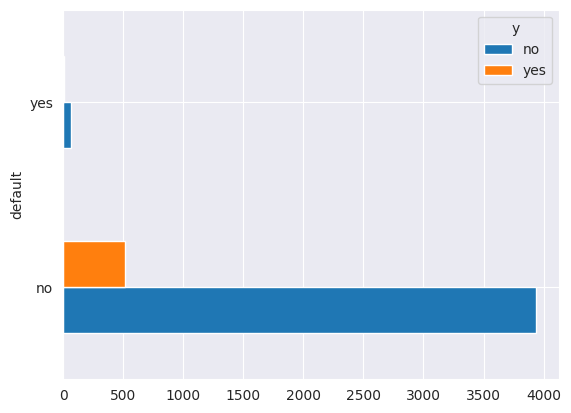

In [31]:
df_train.groupby('default')['y'].value_counts().unstack().plot.barh()

In [32]:
housing=df_train.groupby('housing')['y'].value_counts().unstack()
housing['total']=housing['yes']+housing['no']
housing['accepting percentage']=(housing['yes']/housing['total'])*100
housing

y,no,yes,total,accepting percentage
housing,,,,
no,1661,301,1962,15.341488
yes,2339,220,2559,8.597108


<Axes: ylabel='housing'>

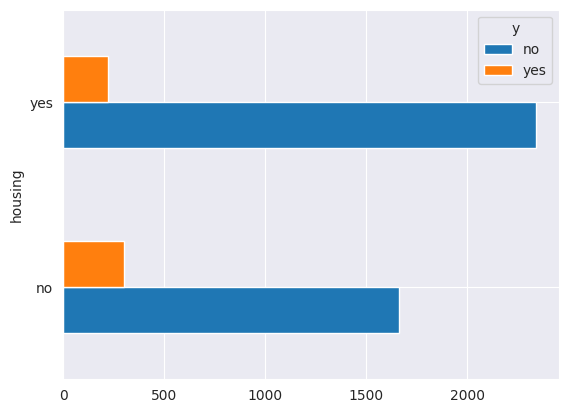

In [33]:
df_train.groupby('housing')['y'].value_counts().unstack().plot.barh()

In [34]:
loan=df_train.groupby('loan')['y'].value_counts().unstack()
loan['total']=loan['yes']+loan['no']
loan['accepting percentage']=(loan['yes']/loan['total'])*100
loan

y,no,yes,total,accepting percentage
loan,,,,
no,3352,478,3830,12.480418
yes,648,43,691,6.222865


<Axes: ylabel='loan'>

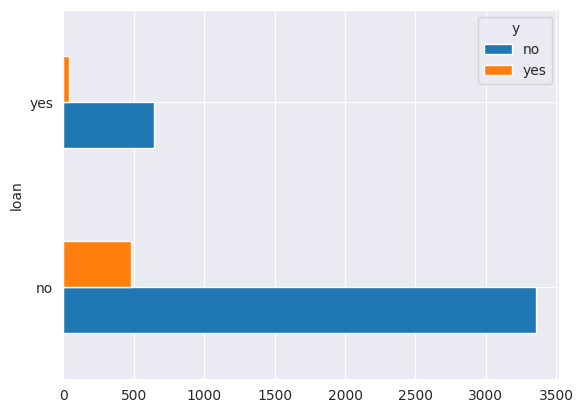

In [35]:
df_train.groupby('loan')['y'].value_counts().unstack().plot.barh()

In [36]:
contact=df_train.groupby('contact')['y'].value_counts().unstack()
contact['total']=contact['yes']+contact['no']
contact['accepting percentage']=(contact['yes']/contact['total'])*100
contact

y,no,yes,total,accepting percentage
contact,,,,
cellular,2480,416,2896,14.364641
telephone,257,44,301,14.617940
unknown,1263,61,1324,4.607251


<Axes: ylabel='contact'>

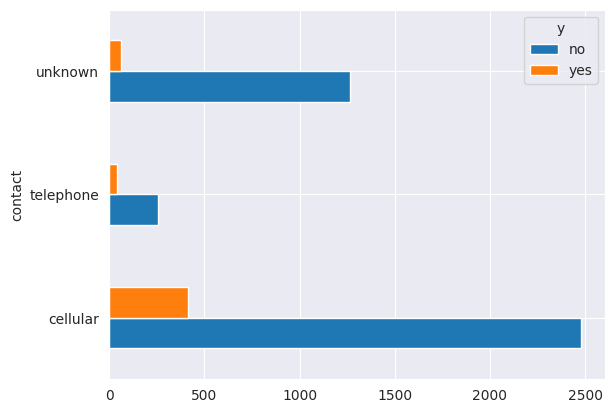

In [37]:
df_train.groupby('contact')['y'].value_counts().unstack().plot.barh()

In [38]:
month=df_train.groupby('month')['y'].value_counts().unstack()
month['total']=month['yes']+month['no']
month['accepting percentage']=(month['yes']/month['total'])*100
month

y,no,yes,total,accepting percentage
month,,,,
apr,237,56,293,19.112628
aug,554,79,633,12.480253
dec,11,9,20,45.000000
feb,184,38,222,17.117117
jan,132,16,148,10.810811
jul,645,61,706,8.640227
jun,476,55,531,10.357815
mar,28,21,49,42.857143
may,1305,93,1398,6.652361


<Axes: ylabel='month'>

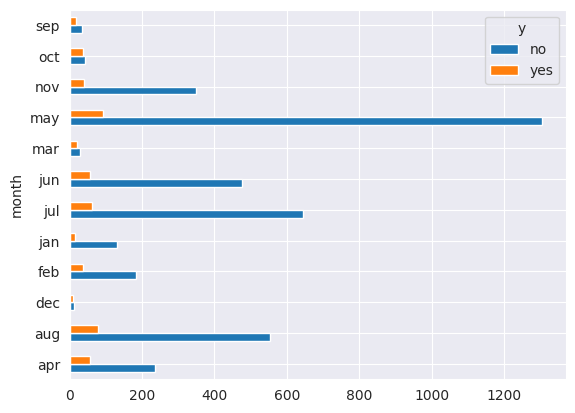

In [39]:
df_train.groupby('month')['y'].value_counts().unstack().plot.barh()

In [40]:
poutcome=df_train.groupby('poutcome')['y'].value_counts().unstack()
poutcome['total']=poutcome['yes']+poutcome['no']
poutcome['accepting percentage']=(poutcome['yes']/poutcome['total'])*100
poutcome

y,no,yes,total,accepting percentage
poutcome,,,,
failure,427,63,490,12.857143
other,159,38,197,19.289340
success,46,83,129,64.341085
unknown,3368,337,3705,9.095816


<Axes: ylabel='poutcome'>

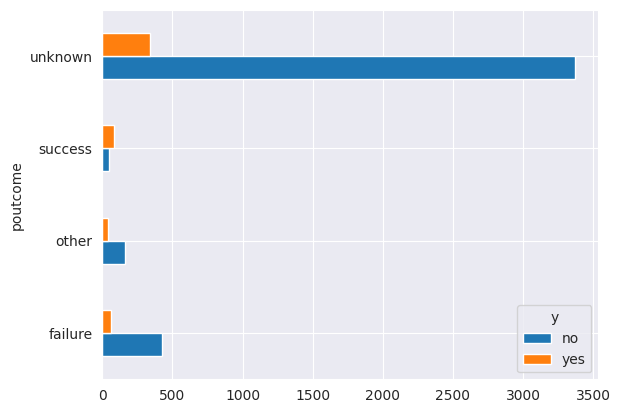

In [41]:
df_train.groupby('poutcome')['y'].value_counts().unstack().plot.barh()

In [42]:
students_data=df_train[df_train['job']=='student']
students_data.groupby('job')['pdays'].value_counts()

job      pdays
student  -1       62
          91       2
          105      2
          127      2
          196      1
          371      1
          358      1
          349      1
          322      1
          224      1
          210      1
          169      1
          183      1
          3        1
          152      1
          117      1
          98       1
          92       1
          38       1
          374      1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='y'>

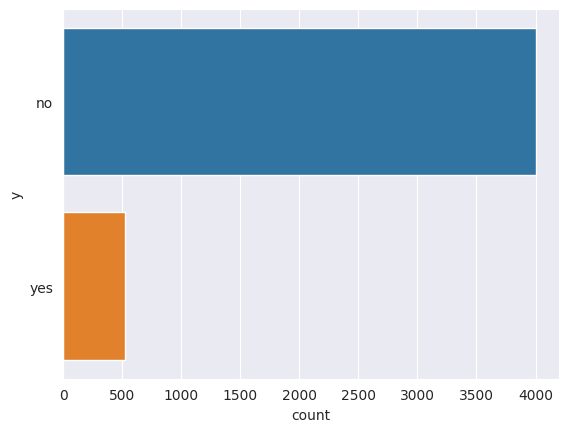

In [43]:
sns.countplot(data=df_train,y='y')

In [44]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [45]:
X=df_train.drop('y',axis='columns')
Y=df_train['y']
print(Y.value_counts())

y
no     4000
yes     521
Name: count, dtype: int64


In [46]:
Y.value_counts()[1]/Y.value_counts()[0]

0.13025

In [47]:
print(X.shape)

(4521, 16)


In [48]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

Xr,Yr = ros.fit_resample(X,Y)
print(Yr.value_counts()[1]/Yr.value_counts()[0])

1.0


In [49]:
Yr.value_counts()

y
no     4000
yes    4000
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xr,Yr,random_state=123,stratify=Yr)

In [51]:
Yr.value_counts()
print(Xr.shape)

(8000, 16)


In [52]:
ytrain.value_counts()

y
yes    3000
no     3000
Name: count, dtype: int64

In [53]:
ytrain.value_counts()[1]/ytrain.value_counts()[0]

1.0

In [54]:
xtrain.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [55]:
xtrain=pd.get_dummies(xtrain)
xtest=pd.get_dummies(xtest)
xtrain

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
6761,32,678,4,1579,1,246,4,True,False,False,...,False,False,False,False,False,False,True,False,False,False
5039,37,3913,27,124,1,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
6096,32,5514,22,319,1,182,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1396,32,687,9,61,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1836,31,2488,20,14,1,-1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,48,810,6,383,1,-1,0,False,False,True,...,True,False,False,False,False,False,False,False,False,True
3553,68,19317,4,249,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7897,35,2658,19,768,2,141,3,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1913,48,7195,21,609,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [56]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(xtrain,ytrain)

ytrainPred = model1.predict(xtrain)
ytestPred = model1.predict(xtest)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print("Training Data Accuracy", (ytrain == ytrainPred).sum()/len(xtrain))
print("Test Data Accuracy", (ytest == ytestPred).sum()/len(xtest))

Training Data Accuracy 0.7925
Test Data Accuracy 0.79


In [58]:
from sklearn.metrics import confusion_matrix
conf_matrix_train = pd.DataFrame(confusion_matrix(ytrain , ytrainPred))
conf_matrix_train

,0,1
0,2415,585
1,660,2340


In [59]:
conf_matrix_test = pd.DataFrame(confusion_matrix(ytest , ytestPred))
conf_matrix_test

,0,1
0,808,192
1,228,772


In [60]:
ypredTrainProb = model1.predict_proba(xtrain)[:,1]

In [61]:
from sklearn.metrics import roc_curve,roc_auc_score

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)

In [63]:
auc = roc_auc_score(ytrain,ypredTrainProb)
print(auc)
fpr,tpr,thresh = roc_curve(ytrain,ypredTrainProb)

0.8704911111111111


In [64]:
g_val = tpr * (1 - fpr)
print(g_val)

[0.         0.         0.002999   0.002998   0.00466356 0.00699533
 0.00866089 0.00966022 0.011992   0.01399067 0.01398133 0.01597867
 0.015968   0.01729867 0.017964   0.02062533 0.02061844 0.02294633
 0.02361144 0.02360356 0.02526578 0.02525733 0.02758367 0.028913
 0.02890333 0.03122889 0.03222556 0.03219322 0.03385267 0.03650778
 0.03816722 0.03815444 0.04080867 0.04246756 0.04479    0.04644889
 0.04640222 0.04905378 0.04903733 0.051688   0.05301333 0.05299556
 0.05531411 0.05796389 0.05962    0.06094489 0.06193856 0.06392589
 0.06624444 0.06790056 0.07088156 0.07187522 0.071827   0.073813
 0.076461   0.077785   0.080764   0.081426   0.083081   0.08606
 0.087715   0.08768556 0.09033267 0.09132533 0.09129467 0.09261778
 0.09252444 0.09450711 0.09441178 0.09540211 0.09705267 0.09702
 0.09933    0.10263    0.10259544 0.10622422 0.10615267 0.106812
 0.107801   0.11043833 0.11040111 0.11171933 0.11168167 0.11530556
 0.11518889 0.115518   0.115479   0.117124   0.117782   0.11770244
 0.1200

In [65]:
print(max(g_val) , np.argmax(g_val))

0.637725 655


In [66]:
print(f"Thresh for max tpr & min fpr = {thresh[np.argmax(g_val)]}")

Thresh for max tpr & min fpr = 0.45727866579660237


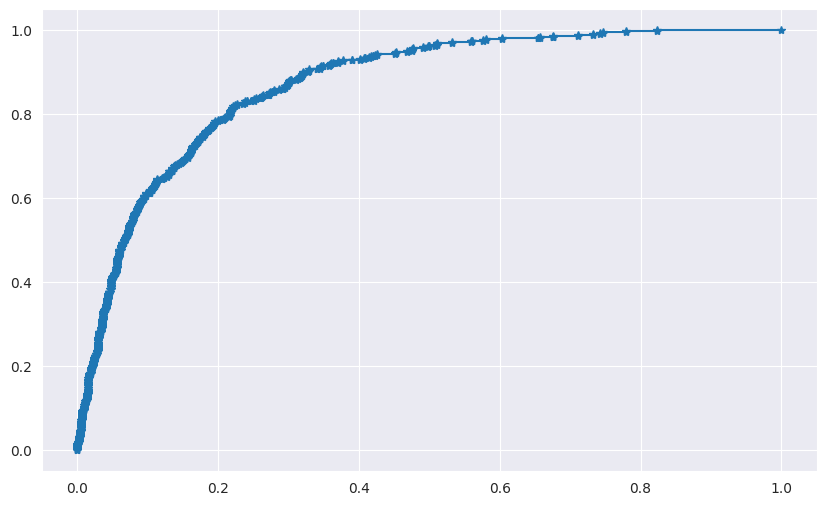

In [67]:
plt.figure(figsize = (10,6))

plt.plot(fpr , tpr , marker = '*')

plt.show()

The score accuracy shoud be improved.
There is an another session yet to be completed.
Thankyou!